#Check Redundant Features Groups

In [0]:
# Data managment 
import pandas as pd 
import numpy as np 

#Visualisation and statistics
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns

sns.set(style="darkgrid")
%matplotlib inline

#Additional
import pickle
import os

In [0]:
%%capture
#Get data, small file so no if
if not os.path.isfile('feature_rank.csv'): 
    !wget 'https://drive.google.com/uc?export=download&id=1VniFAb_J0uHS0PCZMvd7JCEWtX3O8V3t' -O feature_rank.csv

In [0]:
DEFAULT_GROUPS_FUNCS = [
                        ('TPC-ITS_match.',  lambda col: 'tpcIts' in col),
                        ('TPC_nclusters',   lambda col: 'TPC' in col),
                        ('TPC_nclusters',   lambda col: 'TPC' in col and 'slope' not in col),
                        ('TPC_ncl-fits',    lambda col: 'TPC' in col and 'slope' in col),
                        ('vertex',          lambda col: 'vert' in col.lower()),
                        ('multiplicity',    lambda col: 'Mult' in col),
                        ('pT',              lambda col: ('PtA' in col or 'PtC' in col or 'qOverPt' in col) and 'tpcIts' not in col and 'deltaPt' not in col),
                        ('delta pT',        lambda col: 'deltaPt' in col),
                        ('MIP',             lambda col: ('MIP' in col)),
                        ('distr._pulls',    lambda col: 'Pull' in col),
                        ('work._conditions', lambda col: 'PTR' in col or 'HVandPT' in col or 'VDrift' in col),
                        ('DCA-fits',        lambda col: 'dcar' in col or 'dcaz' in col),
                        ('dZ-fits',         lambda col: 'dZA' in col or 'dZC' in col),
                        ('dR-fits',         lambda col: 'dRA' in col or 'dRC' in col),
                        ('random',          lambda col: 'random' in col)
                        ]

In [11]:
#Read feature classification 
rank = pd.read_csv('feature_rank.csv',index_col=0)
rank.head()


,logreg,lasso
0,MIPattachSlopeC,bz
1,resolutionMIPele,meanTPCnclF
2,meanMIP,rmsTPCnclF
3,MIPattachSlopeA,meanTPCChi2
4,meanMIPele,rmsTPCChi2


In [0]:
def find_group (col):
  for g_name, func in DEFAULT_GROUPS_FUNCS:
    if func(col):
      return g_name
  return "No group" 

In [13]:
rank_groups = rank.copy()
for col in rank.columns:
  rank_groups[col] = list(map(find_group, rank[col].values))

rank_groups_red = rank_groups[:100]
print(rank_groups.shape)
print(rank_groups_red.shape)

(233, 2)
(100, 2)


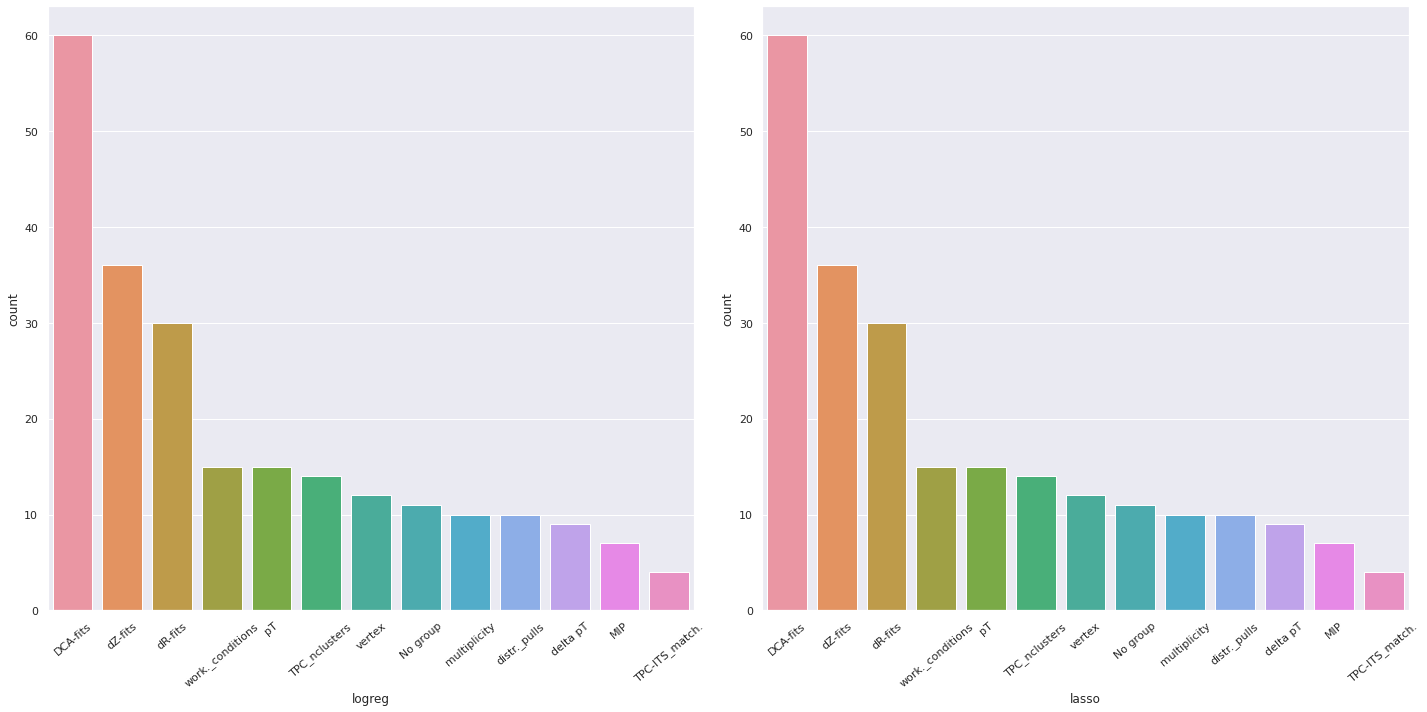

In [14]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
coords = [0,1]

for name, coord in zip(rank_groups.columns , coords):
  sns.countplot(x=name, data=rank_groups, order = rank_groups[name].value_counts().index, ax = ax[coord])
  ax[coord].set_xticklabels(ax[coord].get_xticklabels() , rotation=40) 
plt.tight_layout()
plt.savefig('redundant_features.png', bbox_inches='tight')

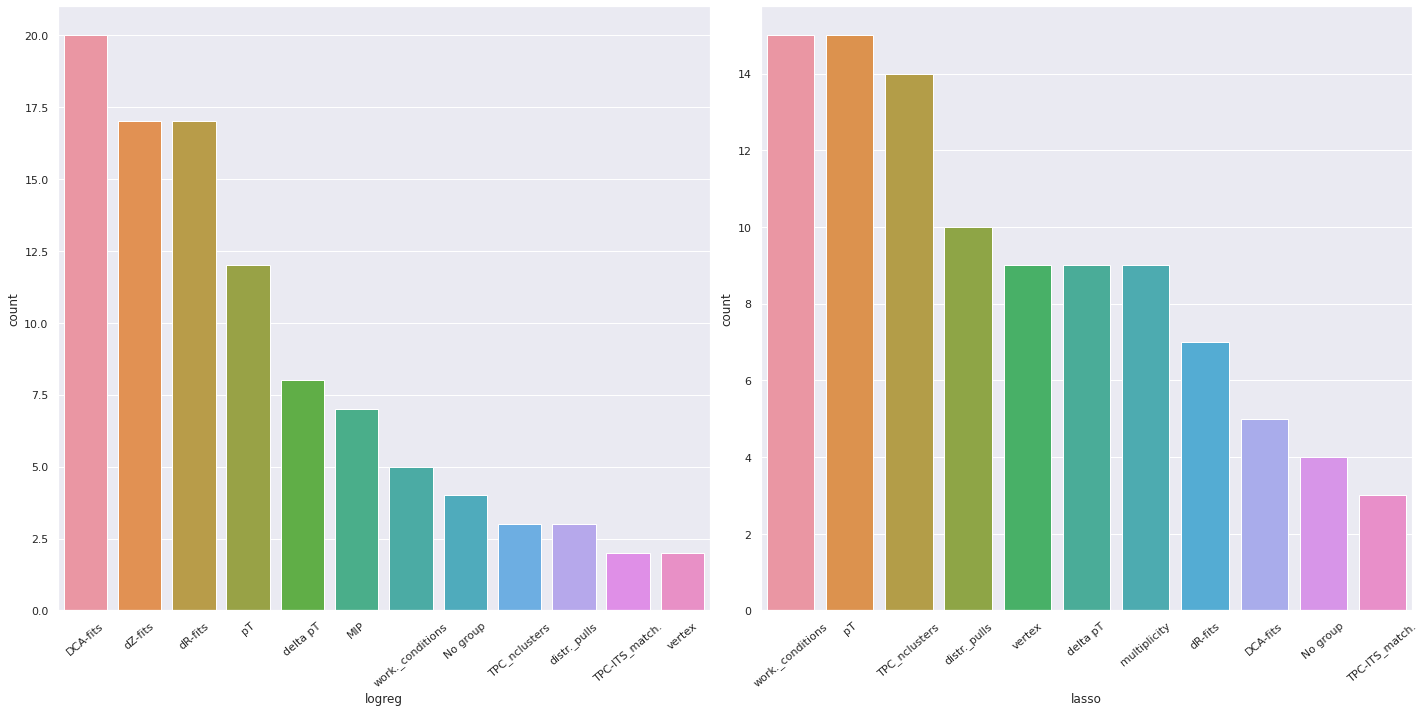

In [16]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
coords = [0,1]

for name, coord in zip(rank_groups_red.columns , coords):
  sns.countplot(x=name, data=rank_groups_red, order = rank_groups_red[name].value_counts().index, ax = ax[coord])
  ax[coord].set_xticklabels(ax[coord].get_xticklabels() , rotation=40) 
plt.tight_layout()
plt.savefig('redundant_features.png', bbox_inches='tight')